In [ ]:
#import libraries 
import tensorflow as tf
import keras
from keras.layers import Dense,Dropout,Activation,Add,MaxPooling2D,Conv2D,Flatten,BatchNormalization,MaxPool2D
from keras.models import Sequential
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

In [78]:
#import train data
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="training"
)

Found 40500 files belonging to 27 classes.
Using 32400 files for training.


In [79]:
#import validation data
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets", labels='inferred', label_mode='int', class_names=None,
    color_mode='rgb', batch_size=32, image_size=(50, 50), shuffle=True, seed=123,
    validation_split=0.2, subset="validation"
)

Found 40500 files belonging to 27 classes.
Using 8100 files for validation.


In [80]:
#listing the classes
import os
labels = os.listdir("C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets")
labels.sort()
print(labels)

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'unknown', 'v', 'w', 'x', 'y', 'z']


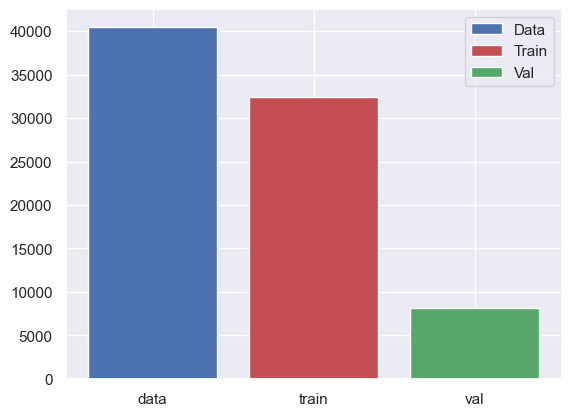

In [81]:
#visulaize data
fig, ax = plt.subplots()
ax.bar("data",40500 ,color= 'b', label='Data')
ax.bar("train",32400 ,color= 'r', label='Train')
ax.bar("val",8100 ,color='g', label='Val')
leg = ax.legend();

In [82]:
train_data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 50, 50, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [85]:
#Previewing dataset
def preview_dataset(dataset, nrow=4, ncol=8):
    plt.figure(figsize=(ncol*2,nrow*2))
    i = 0
    for (image, label) in train_data.take(nrow*ncol):
        image = image.numpy()[0].reshape((50,50,3))/255.0
        plt.subplot(nrow,ncol,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(image)
        plt.xlabel(labels[label[0].numpy()])
        i += 1
    plt.show()

Training Dataset


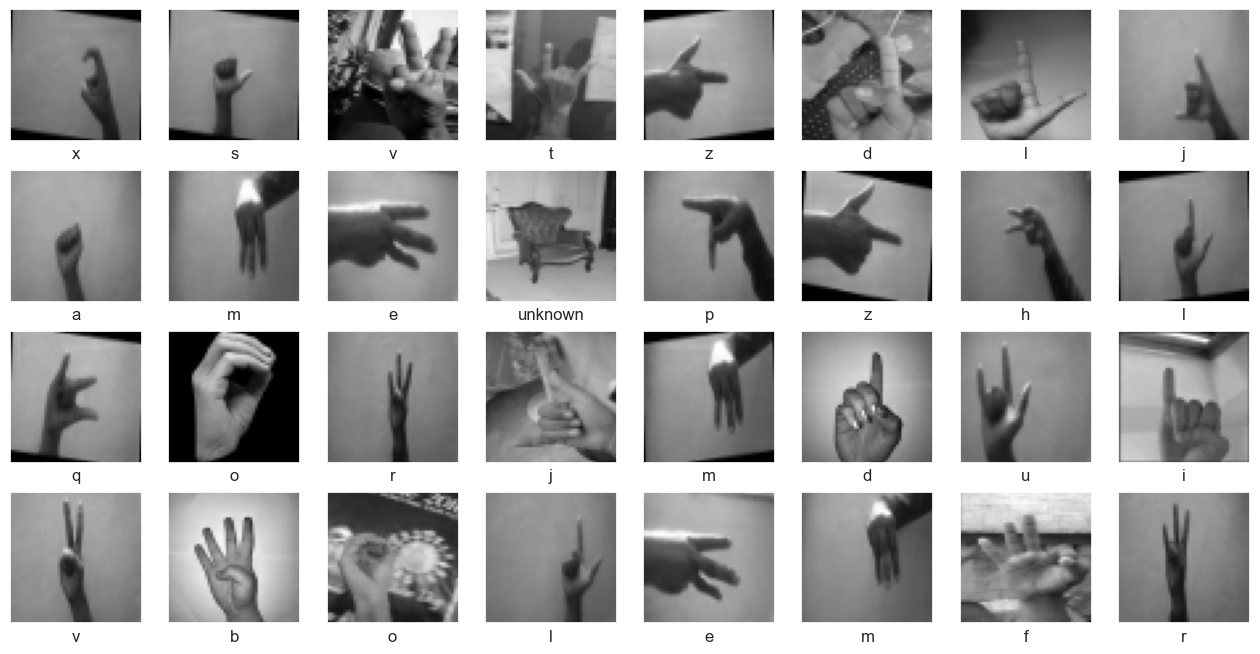

In [86]:
print("Training Dataset")
preview_dataset(train_data)

Validation Dataset


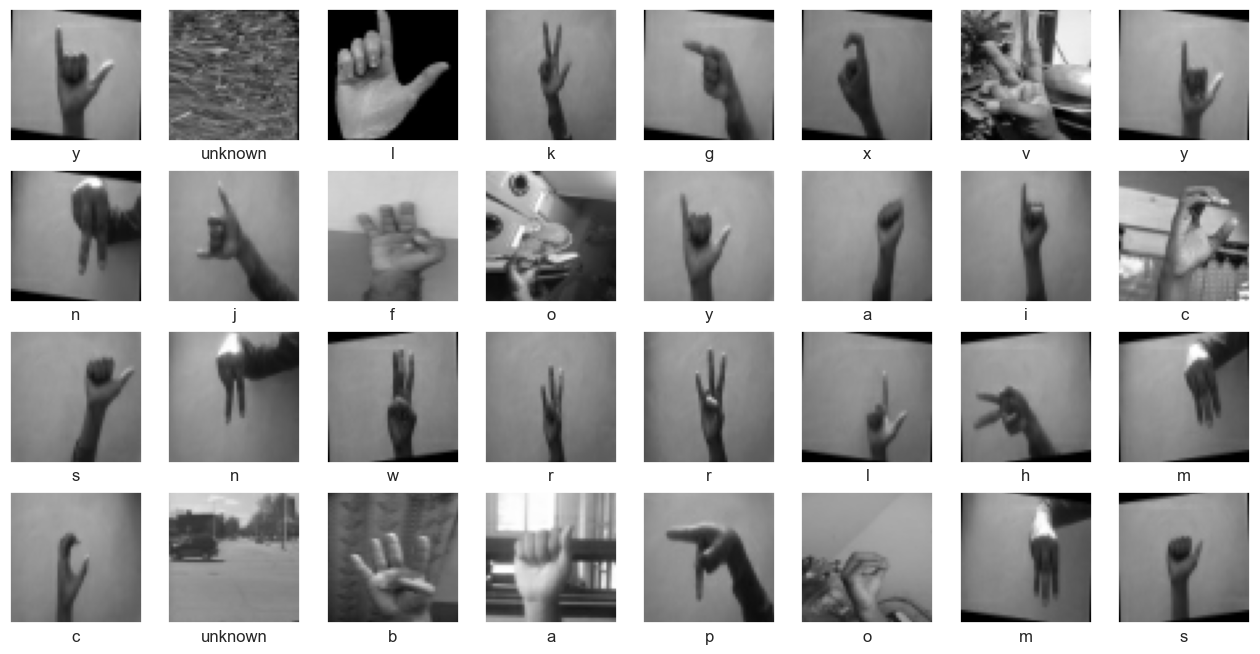

In [87]:
print("Validation Dataset")
preview_dataset(val_data)

In [74]:
#resnet architecture
from tensorflow.keras.layers import Input, BatchNormalization, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Add, ReLU
from tensorflow.keras.models import Model

# Define input shape
input_shape = (50, 50, 3)

# Define input tensor
inputs = Input(shape=input_shape)

# Initial convolution layer
x = Conv2D(64, kernel_size=(3,3), padding='same')(inputs)
x = BatchNormalization()(x)
x = ReLU()(x)

# Residual blocks
for _ in range(3):
    shortcut = x
    
    x = Conv2D(64, kernel_size=(3,3), padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(64, kernel_size=(3,3), padding='same')(x)
    x = BatchNormalization()(x)
    
    # Add skip connection
    x = Add()([shortcut, x])
    x = ReLU()(x)
    
    x = MaxPooling2D(pool_size=(2,2))(x)

# Flatten and dense layers
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
outputs = Dense(27, activation='softmax')(x)

# Define the model
model = Model(inputs=inputs, outputs=outputs)
model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 50, 50, 3)]  0           []                               
                                                                                                  
 conv2d_35 (Conv2D)             (None, 50, 50, 64)   1792        ['input_6[0][0]']                
                                                                                                  
 batch_normalization_35 (BatchN  (None, 50, 50, 64)  256         ['conv2d_35[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 re_lu_35 (ReLU)                (None, 50, 50, 64)   0           ['batch_normalization_35[0]

In [30]:
#compiling the model
model.compile(optimizer='Adam', metrics=['accuracy'], loss='sparse_categorical_crossentropy')

In [31]:
#monitors the validation loss
call = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True)

In [32]:
#training the model
fit= model.fit(train_data,validation_data=val_data,epochs=20,callbacks=[call])

Epoch 1/20
1013/1013 [==============================] - 415s 408ms/step - loss: 2.2828 - accuracy: 0.3303 - val_loss: 1.6121 - val_accuracy: 0.5779
Epoch 2/20
1013/1013 [==============================] - 420s 415ms/step - loss: 1.5950 - accuracy: 0.4991 - val_loss: 1.6801 - val_accuracy: 0.4885
Epoch 3/20
1013/1013 [==============================] - 435s 429ms/step - loss: 1.3793 - accuracy: 0.5625 - val_loss: 0.9601 - val_accuracy: 0.7500
Epoch 4/20
1013/1013 [==============================] - 456s 450ms/step - loss: 1.2669 - accuracy: 0.5939 - val_loss: 1.1230 - val_accuracy: 0.6728
Epoch 5/20
1013/1013 [==============================] - 417s 412ms/step - loss: 1.1819 - accuracy: 0.6180 - val_loss: 0.6786 - val_accuracy: 0.8277
Epoch 6/20
1013/1013 [==============================] - 417s 411ms/step - loss: 1.0261 - accuracy: 0.6681 - val_loss: 0.8198 - val_accuracy: 0.7789
Epoch 7/20
1013/1013 [==============================] - 442s 436ms/step - loss: 0.9342 - accuracy: 0.6957 - val_

In [33]:
model.evaluate(val_data)

254/254 [==============================] - 25s 99ms/step - loss: 0.1182 - accuracy: 0.9728


[0.11816398054361343, 0.9728395342826843]

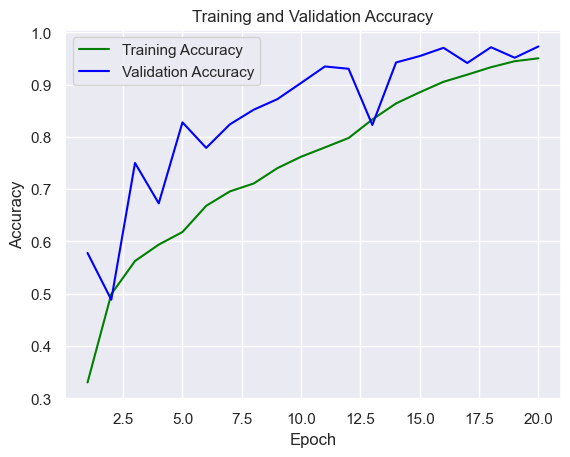

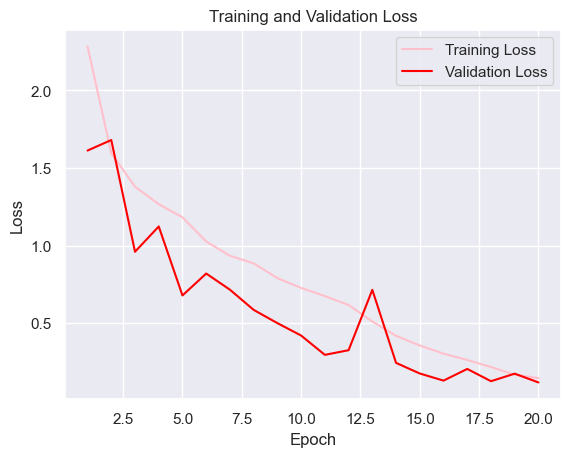

In [34]:
#plotting training values
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

acc = fit.history['accuracy']
val_acc = fit.history['val_accuracy']
loss = fit.history['loss']
val_loss = fit.history['val_loss']
epochs = range(1, len(loss) + 1)

#accuracy plot
plt.plot(epochs, acc, color='green', label='Training Accuracy')
plt.plot(epochs, val_acc, color='blue', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure()
#loss plot
plt.plot(epochs, loss, color='pink', label='Training Loss')
plt.plot(epochs, val_loss, color='red', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [35]:
# serialize weights to HDF5
model.save("./resnet_model.h5")

In [70]:
labels = {0: 'a', 1: 'b', 2: 'c', 3: 'd', 4: 'e', 5: 'f', 6: 'g', 7: 'h', 8: 'i', 9: 'j', 
               10: 'k', 11: 'l', 12: 'm', 13: 'n', 14: 'o', 15: 'p', 16: 'q', 17: 'r', 18: 's', 
               19: 't', 20: 'u', 21: 'unknown', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z' }


1/1 [==============================] - 0s 24ms/step
[1]
b


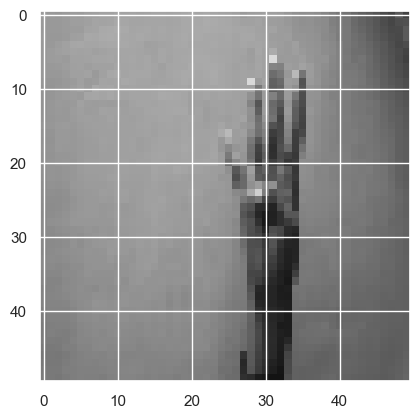

In [38]:
#test 1
image_path = "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets/b/b_10.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(labels[prediction[0]])
plt.imshow(new_img)

1/1 [==============================] - 0s 28ms/step
[17]
r


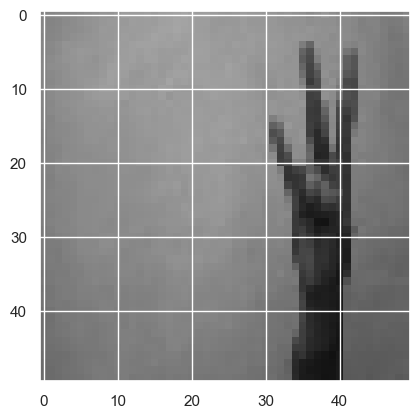

In [39]:
#test 2
image_path = "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets/r/r_10.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(labels[prediction[0]])
plt.imshow(new_img)

1/1 [==============================] - 0s 26ms/step
[0]
a


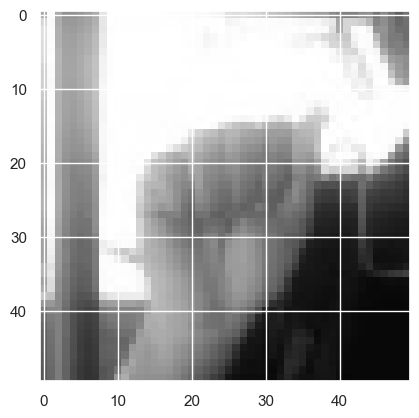

In [40]:
#test 3
image_path = "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets/a/a_10.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(labels[prediction[0]])
plt.imshow(new_img)

1/1 [==============================] - 0s 22ms/step
[22]
v


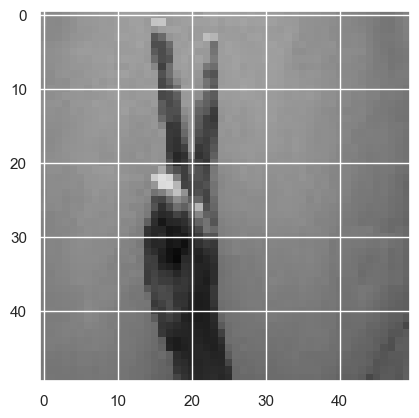

In [60]:
#test 4
image_path = "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets/v/v_10.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(labels[prediction[0]])
plt.imshow(new_img)

1/1 [==============================] - 0s 24ms/step
[23]
w


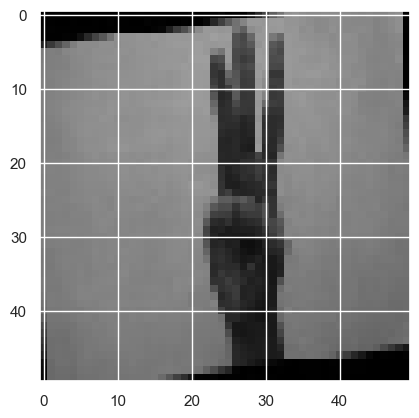

In [47]:
#test 5
image_path = "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets/w/w_10.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(labels[prediction[0]])
plt.imshow(new_img)

1/1 [==============================] - 0s 379ms/step
[24]
x


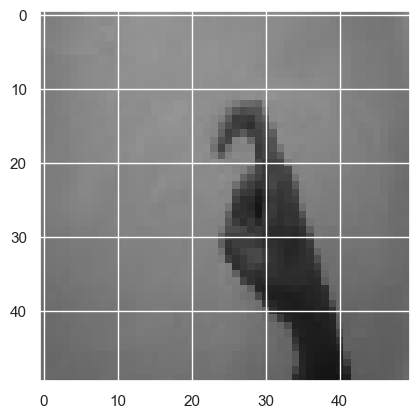

In [76]:
#test 6
image_path = "C:/AU/AU third year/6th sem/cv/archive/Sign Language for Alphabets/x/x_10.jpg"
new_img = image.load_img(image_path, target_size=(50, 50))
img = image.img_to_array(new_img)
img = np.expand_dims(img, axis=0)
prediction = model.predict(img)
prediction = np.argmax(prediction,axis=1)
print(prediction)
print(labels[prediction[0]])
plt.imshow(new_img)